# Project 2 - Sentimental Analysis of Fine Foods Reviews
##### Data from Amazon.com (source: Kaggle)

## 1. Import Libraries and Loading The Dataset

In [1]:
# Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization
from datetime import datetime # datetime processing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score #Machine learning
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report #Machine learning
from sklearn.metrics import roc_auc_score,roc_curve #Machine learning
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer #Bag of words vectorization

##### Our data is divided in 14 smaller datasets, so we first have to concatenate them all.

In [2]:
# Loading the diabetes datasets
df01 = pd.read_csv("https://raw.githubusercontent.com/merlijn8686/amazonreviews/main/reviews01.csv")
df02 = pd.read_csv("https://raw.githubusercontent.com/merlijn8686/amazonreviews/main/reviews02.csv")
df03 = pd.read_csv("https://raw.githubusercontent.com/merlijn8686/amazonreviews/main/reviews03.csv")
df04 = pd.read_csv("https://raw.githubusercontent.com/merlijn8686/amazonreviews/main/reviews04.csv")
df05 = pd.read_csv("https://raw.githubusercontent.com/merlijn8686/amazonreviews/main/reviews05.csv")
df06 = pd.read_csv("https://raw.githubusercontent.com/merlijn8686/amazonreviews/main/reviews06.csv")
df07 = pd.read_csv("https://raw.githubusercontent.com/merlijn8686/amazonreviews/main/reviews07.csv")
df08 = pd.read_csv("https://raw.githubusercontent.com/merlijn8686/amazonreviews/main/reviews08.csv")
df09 = pd.read_csv("https://raw.githubusercontent.com/merlijn8686/amazonreviews/main/reviews09.csv")
df10 = pd.read_csv("https://raw.githubusercontent.com/merlijn8686/amazonreviews/main/reviews10.csv")
df11 = pd.read_csv("https://raw.githubusercontent.com/merlijn8686/amazonreviews/main/reviews11.csv")
df12 = pd.read_csv("https://raw.githubusercontent.com/merlijn8686/amazonreviews/main/reviews12.csv")
df13 = pd.read_csv("https://raw.githubusercontent.com/merlijn8686/amazonreviews/main/reviews13.csv")
df14 = pd.read_csv("https://raw.githubusercontent.com/merlijn8686/amazonreviews/main/reviews14.csv")

In [3]:
# Now we concatenate them all, we have to set ignore_index=True, because every dataset has it's own index started with zero.

df = pd.concat([df01, df02, df03, df04, df05, df06, df07, df08, df09, df10, df11, df12, df13, df14], ignore_index=True)

## 2. Exploring the Dataset

In [4]:
#First let's have a look at the beginning and the end of the dataset, to see if the index is OK.
df.head(50)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [5]:
df.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


The index seems to be OK after we concatenated the datasets, let's have a look at the variables.

#### Variables
<ul>
    <li>Id: Row ID (starting at 1).</li>
    <li>ProductId: ID of the product the customer bought.</li>
    <li>UserId: ID of the customer.</li>
    <li>ProfileName: Profilename of the customer.</li>
    <li>HelpfulnessNumerator: Number of users who found the review helpful.</li>
    <li>HelpfulnessDenominator: Number of users who indicated whether they found the review helpful or not.</li>
    <li>Score: Rating of the product (1-5).</li>
    <li>Time: Timestamp for the review.</li>
    <li>Summary: Summary of the review.</li>
    <li>Text: Text of the review.</li>
</ul>

#### Overview

In [6]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


#### Missings and useful columns

It seems there are a few missings in the Summary column and the ProfileName columns.<br>
Since we have the UserId column without any missings, we can drop the ProfileName columns.<br>
And we will focus our analysis on the text of the review, not on the summary, so we can also drop the Summary column.<br>
We also don't need the row ID since we have an index.<br>
The rest of the columns seem to be useful.<br>

In [8]:
# Drop useless columns

reviews = df.drop(['Id', 'ProfileName', 'Summary'], axis=1)
reviews.head()

,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,1303862400,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,1346976000,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,1219017600,This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,3,3,2,1307923200,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,1350777600,Great taffy at a great price. There was a wid...


#### Creating extra columns

For further exploration we need some new variables. <br>
First we create a column with the length of the review. <br>
Second we create column which will be our target variable which is the category of the score of the review.<br> 
A score of less than 3 is negative, 3 is neutral and higher than 3 is positive.

In [9]:
reviews['LengthOfReview'] = reviews['Text'].str.len()
reviews.head()

,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text,LengthOfReview
0,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,1303862400,I have bought several of the Vitality canned d...,263
1,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,1346976000,Product arrived labeled as Jumbo Salted Peanut...,190
2,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,1219017600,This is a confection that has been around a fe...,509
3,B000UA0QIQ,A395BORC6FGVXV,3,3,2,1307923200,If you are looking for the secret ingredient i...,219
4,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,1350777600,Great taffy at a great price. There was a wid...,140


In [10]:
def sentiment(row):
    if row['Score'] < 3:
        return 'Negative'
    elif row['Score'] == 3:
        return 'Neutral'
    else:
        return 'Positive'

In [11]:
reviews['Sentiment'] = reviews.apply(sentiment, axis=1)

In [12]:
reviews.head()

,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text,LengthOfReview,Sentiment
0,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,1303862400,I have bought several of the Vitality canned d...,263,Positive
1,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,1346976000,Product arrived labeled as Jumbo Salted Peanut...,190,Negative
2,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,1219017600,This is a confection that has been around a fe...,509,Positive
3,B000UA0QIQ,A395BORC6FGVXV,3,3,2,1307923200,If you are looking for the secret ingredient i...,219,Negative
4,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,1350777600,Great taffy at a great price. There was a wid...,140,Positive


## 3. Data Visualization

#### Histograms

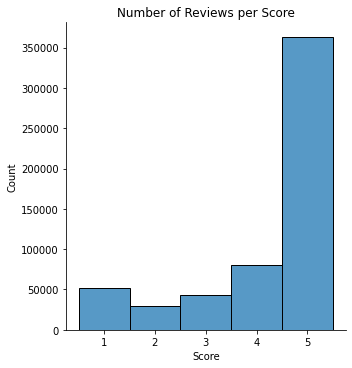

In [13]:
sns.displot(reviews, x="Score", bins=5, discrete=True).set(title='Number of Reviews per Score')

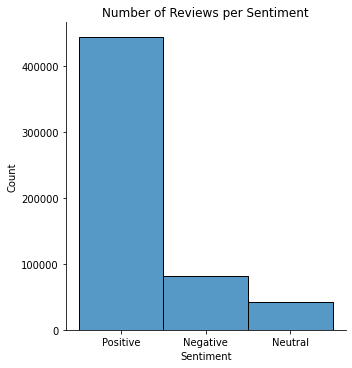

In [14]:
sns.displot(reviews, x="Sentiment", bins=3, discrete=True).set(title='Number of Reviews per Sentiment')

In this histogram we see that there are way more positive reviews than negative reviews. This is something to keep in mind when we are going to make the model. 
<br><br>


#### Heatmap

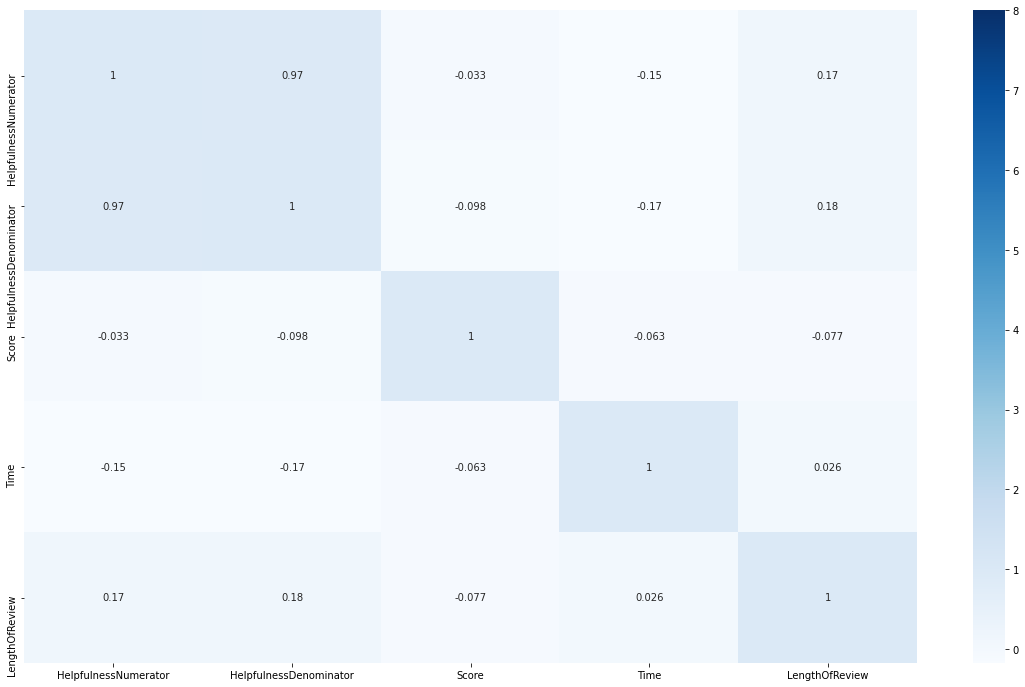

In [15]:
corr = reviews.corr()
f, ax = plt.subplots(figsize = (20, 12))
sns.heatmap(corr, vmax = 8, annot = True, cmap="Blues");

We see that the score isn't depending on the length or helfulness of the review.

## 4. Data Preperation

#### Split the Data

In [16]:
# "Sentiment" is the target variable and "Text" is the predictor, so we first start by creating y (target) and X (predictor).

X = reviews["Text"]
y = reviews["Sentiment"]

In [17]:
# Creating a test and training set with a test size of 30 percent. 

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

#### Bag of words vectorization

We will use a vectorizer to analyze the words that are used in the "Text" column. <br>
For more information about the vectorizer see: <br>
https://towardsdatascience.com/text-vectorization-bag-of-words-bow-441d1bfce897

In [18]:
vectorizer = TfidfVectorizer()
train_X_vectors = vectorizer.fit_transform(X_train)

test_X_vectors = vectorizer.transform(X_test)

## 5. Logistic Regression

We use a logistic regression, which is often used in a sentimental analysis.<br>
We could also use a Support Vector Machines (SVM) model, but this is taking too long / too much CPU for this small project. 

#### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(solver = "liblinear").fit(train_X_vectors, y_train)
y_pred = log_model.predict(test_X_vectors)
print("Logistic Regression Accuracy Score = " + str(accuracy_score(y_test, y_pred)))
print("Cross validation score = "+ str(cross_val_score(log_model, test_X_vectors, y_test, cv = 5).mean()))
print( )
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy Score = 0.8762849117786756
Cross validation score = 0.8666799625605837

              precision    recall  f1-score   support

    Negative       0.76      0.70      0.73     24278
     Neutral       0.61      0.19      0.29     12850
    Positive       0.90      0.97      0.94    133409

    accuracy                           0.88    170537
   macro avg       0.76      0.62      0.65    170537
weighted avg       0.86      0.88      0.86    170537



Our model seems to be very good at predicting if a review is positive. <br>
But not that good if a review is neutral. <br>
Predicting a negative review seems to be OK, but maybe it's better after some finetuning. 

#### Parameter Optimization

In [23]:
# Create GridsearchCV and fit the model

log_grid_dict={"C":np.logspace(-4,4,20), 
                "penalty":["l2"], 
                "solver":['liblinear', 'saga']}

logreg_grid=GridSearchCV(LogisticRegression(), log_grid_dict, cv=3, n_jobs=-1, verbose=True)

logreg_grid.fit(train_X_vectors,y_train)

# Print the best parameters

print("Best Params: " + str(logreg_grid.best_params_))

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 48.8min finished


Best Params: {'C': 29.763514416313132, 'penalty': 'l2', 'solver': 'liblinear'}


In [24]:
log_best_param = LogisticRegression(solver = "liblinear", C=29.763514416313132).fit(train_X_vectors,y_train)
y_pred = log_best_param.predict(test_X_vectors)

print("Optimized Logistic Regression Accuracy Score = " + str(accuracy_score(y_test, y_pred)))
print("Cross validation score = "+ str(cross_val_score(log_best_param, test_X_vectors, y_test, cv = 5).mean()))
print( )
print(classification_report(y_test, y_pred))

Optimized Logistic Regression Accuracy Score = 0.8884464954819189
Cross validation score = 0.8752763431128237

              precision    recall  f1-score   support

    Negative       0.78      0.75      0.76     24278
     Neutral       0.61      0.34      0.43     12850
    Positive       0.92      0.97      0.94    133409

    accuracy                           0.89    170537
   macro avg       0.77      0.68      0.71    170537
weighted avg       0.88      0.89      0.88    170537

